In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the ml-1m dataset
users_file = './ml-1m/users.dat'
header = ['user_id', 'gender', 'age', 'occupation', 'zipcode']
users = pd.read_csv(users_file, sep='::', names=header, engine='python', encoding='latin-1')


In [12]:
users['age']

0        1
1       56
2       25
3       45
4       25
        ..
6035    25
6036    45
6037    56
6038    45
6039    25
Name: age, Length: 6040, dtype: int64

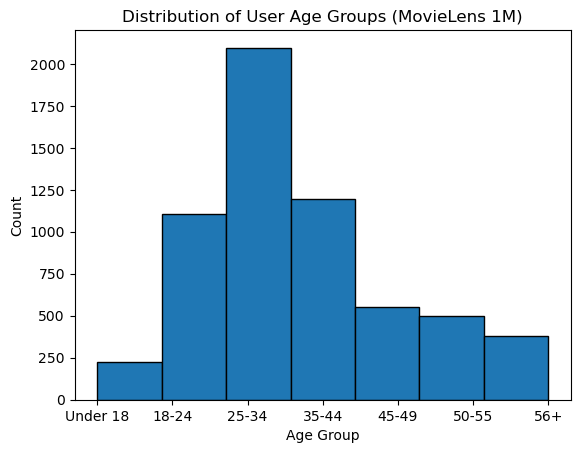

In [28]:

age_groups = ["Under 18", "18-24", "25-34", "35-44", "45-49", "50-55", "56+"]

age_group_mapping = {"Under 18": 1, "18-24": 2, "25-34": 3, "35-44": 4, "45-49": 5, "50-55": 6, "56+": 7}
users['age_group_numeric'] = users['age_group'].map(age_group_mapping)

df_sorted = users.sort_values('age_group_numeric')

plt.hist(df_sorted['age_group_numeric'], bins=len(age_groups), edgecolor='black', align='mid')

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of User Age Groups (MovieLens 1M)')

plt.xticks(range(1, len(age_groups) + 1), age_groups)

plt.savefig("./data_graphs/user_ages1m")


plt.show()

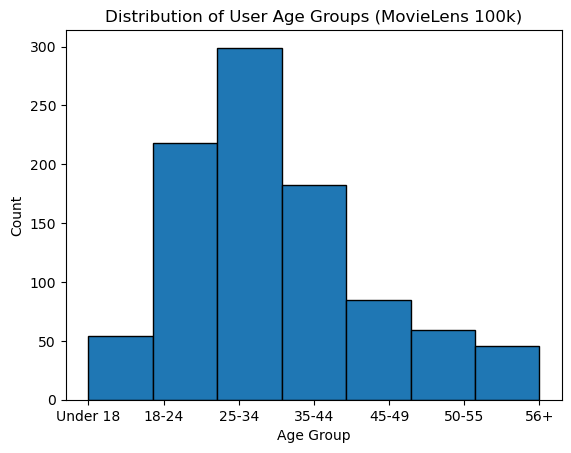

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

users_file = './ml-100k/u.user'
header = ['user_id', 'age', 'gender', 'occupation', 'zipcode']
df = pd.read_csv(users_file, sep='|', names=header)
age_groups = ["Under 18", "18-24", "25-34", "35-44", "45-49", "50-55", "56+"]

age_group_ranges = [0, 18, 25, 35, 45, 50, 56, float('inf')]

df['age_group'] = pd.cut(df['age'], bins=age_group_ranges, labels=age_groups)

df_sorted = df.sort_values('age_group')

plt.hist(df_sorted['age_group'], bins=len(age_groups), edgecolor='black', align='mid')

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of User Age Groups (MovieLens 100k)')

plt.xticks(range(len(age_groups)), age_groups)
plt.savefig("./data_graphs/user_ages100K")
plt.show()


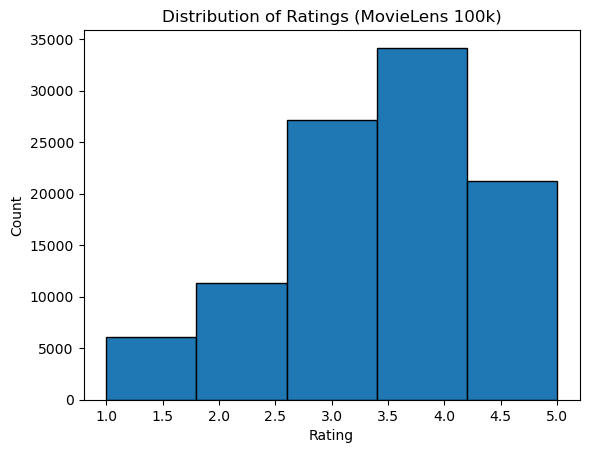

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

ratings_file = './ml-100k/u.data'
header = ['user_id', 'item_id', 'rating', 'timestamp']
ratings = pd.read_csv(ratings_file, sep='\t', names=header)

plt.hist(ratings['rating'], bins=5, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings (MovieLens 100k)')
plt.show()


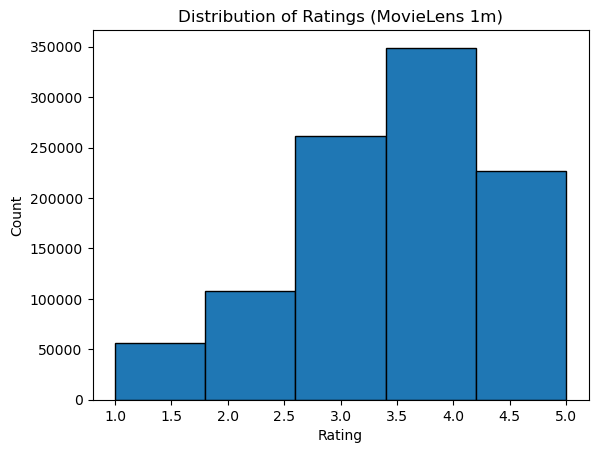

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

ratings_file = './ml-1m/ratings.dat'
header = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv(ratings_file, sep='::', names=header, engine='python', encoding='latin-1')

plt.hist(ratings['rating'], bins=5, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings (MovieLens 1m)')
plt.show()


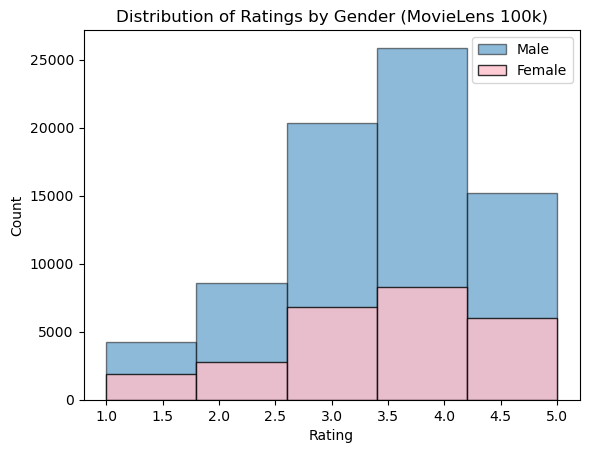

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

ratings_file = './ml-100k/u.data'
header = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv(ratings_file, sep='\t', names=header)

users_file = './ml-100k/u.user'
header = ['user_id', 'age', 'gender', 'occupation', 'zipcode']
user_df = pd.read_csv(users_file, sep='|', names=header)


merged_df = df.merge(user_df, on='user_id')

male_ratings = merged_df[merged_df['gender'] == 'M']['rating']
female_ratings = merged_df[merged_df['gender'] == 'F']['rating']

plt.hist(male_ratings, bins=5, alpha=0.5, label='Male', edgecolor='black')
plt.hist(female_ratings, bins=5, alpha=0.8, label='Female', edgecolor='black', color='pink')

plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings by Gender (MovieLens 100k)')
plt.legend()
plt.savefig('./data_graphs/sex_ratings100k')
plt.show()


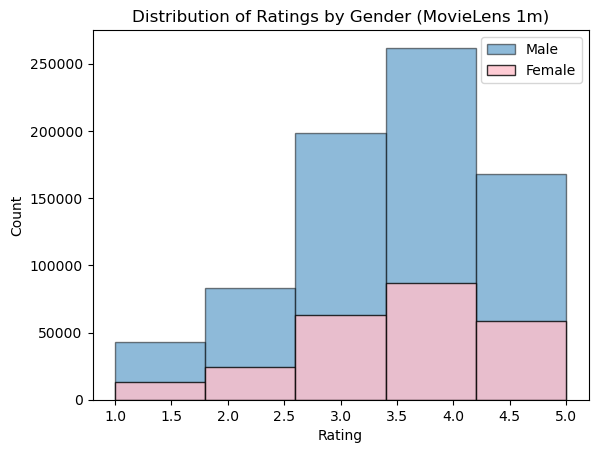

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

ratings_file = './ml-1m/ratings.dat'
header = ['user_id', 'movie_id', 'rating', 'timestamp']
df = pd.read_csv(ratings_file, sep='::', names=header, engine='python')

users_file = './ml-1m/users.dat'
header = ['user_id', 'gender', 'age', 'occupation', 'zipcode']
user_df = pd.read_csv(users_file, sep='::', names=header, engine='python')

merged_df = df.merge(user_df, on='user_id')

male_ratings = merged_df[merged_df['gender'] == 'M']['rating']
female_ratings = merged_df[merged_df['gender'] == 'F']['rating']

plt.hist(male_ratings, bins=5, alpha=0.5, label='Male', edgecolor='black')
plt.hist(female_ratings, bins=5, alpha=0.8, label='Female', edgecolor='black', color='pink')

plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings by Gender (MovieLens 1m)')
plt.legend()
plt.savefig('./data_graphs/sex_ratings1m')
plt.show()


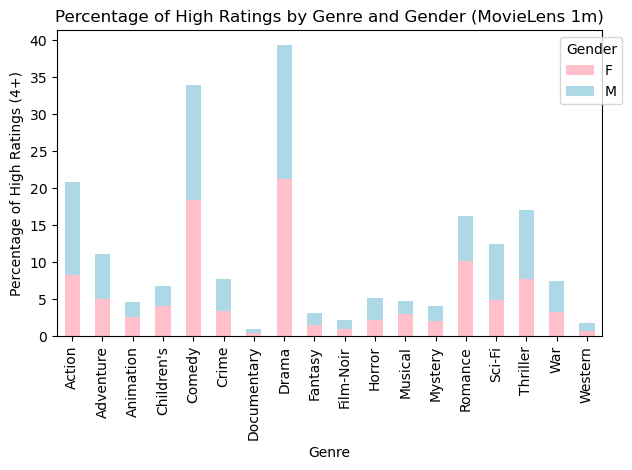

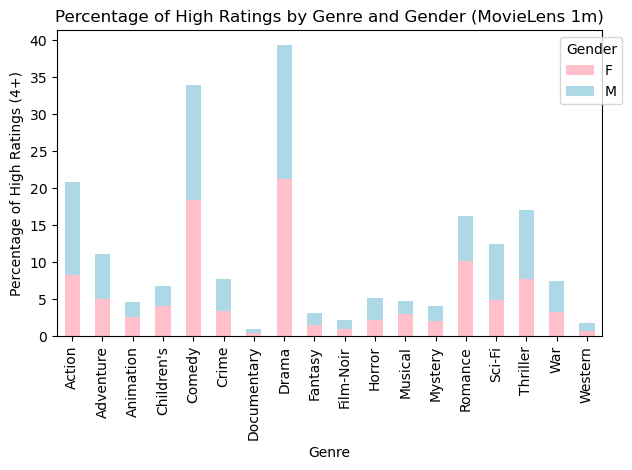

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

ratings_file = './ml-1m/ratings.dat'
header = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings_df = pd.read_csv(ratings_file, sep='::', names=header, engine='python', encoding='latin-1')

movies_file = './ml-1m/movies.dat'
header = ['movie_id', 'title', 'genres']
movies_df = pd.read_csv(movies_file, sep='::', names=header, engine='python', encoding='latin-1')

users_file = './ml-1m/users.dat'
header = ['user_id', 'gender', 'age', 'occupation', 'zipcode']
users_df = pd.read_csv(users_file, sep='::', names=header, engine='python', encoding='latin-1')

merged_df = ratings_df.merge(users_df, on='user_id')
merged_df = merged_df.merge(movies_df, on='movie_id')

# Filter for ratings of 4 or higher
high_ratings = merged_df[merged_df['rating'] >= 4]

# Split the genres column into separate genres
genres_df = merged_df['genres'].str.get_dummies('|')

high_ratings_with_genres = pd.concat([high_ratings, genres_df], axis=1)

genre_ratings = high_ratings_with_genres.groupby('gender')[genres_df.columns].sum()

genre_ratings_percent = genre_ratings.div(genre_ratings.sum(axis=1), axis=0) * 100

genre_ratings_percent.T.plot(kind='bar', stacked=True, color=['pink','lightblue'])

plt.xlabel('Genre')
plt.ylabel('Percentage of High Ratings (4+)')
plt.title('Percentage of High Ratings by Genre and Gender (MovieLens 1m)')

plt.legend(title='Gender', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.savefig('./data_graphs/sex_genre_distro1m.png')
plt.show()


